In [1]:
import numpy as np
import pandas as pd
import math # has math functions
from sklearn.linear_model import LinearRegression, LogisticRegression # is the package to build the linear regression model
from sklearn import metrics, tree # contains functions for module evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tools
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

# 

In [4]:
df = pd.read_csv('Project_Data.csv')
df.head()
df.shape

(7043, 31)

In [5]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [15]:
# this shows that the only null values are for reason when churn value is 0 which is wholly logical.
nullReason = df[df['Churn Reason'].isna()]
nullReason['Churn Value'].value_counts()

Churn Value
0    5174
Name: count, dtype: int64

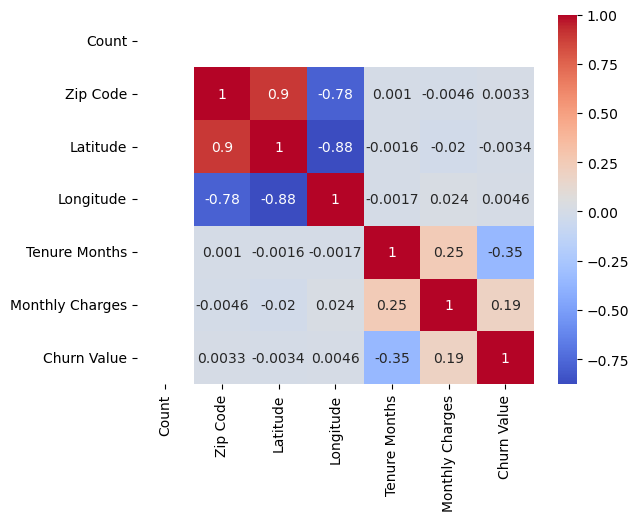

In [17]:
# Creating correlation to see what factors have a negative correlation with churn value.
sns.heatmap(data = df.corr(numeric_only = True),
            cmap = 'coolwarm', 
            annot=True)
plt.show()

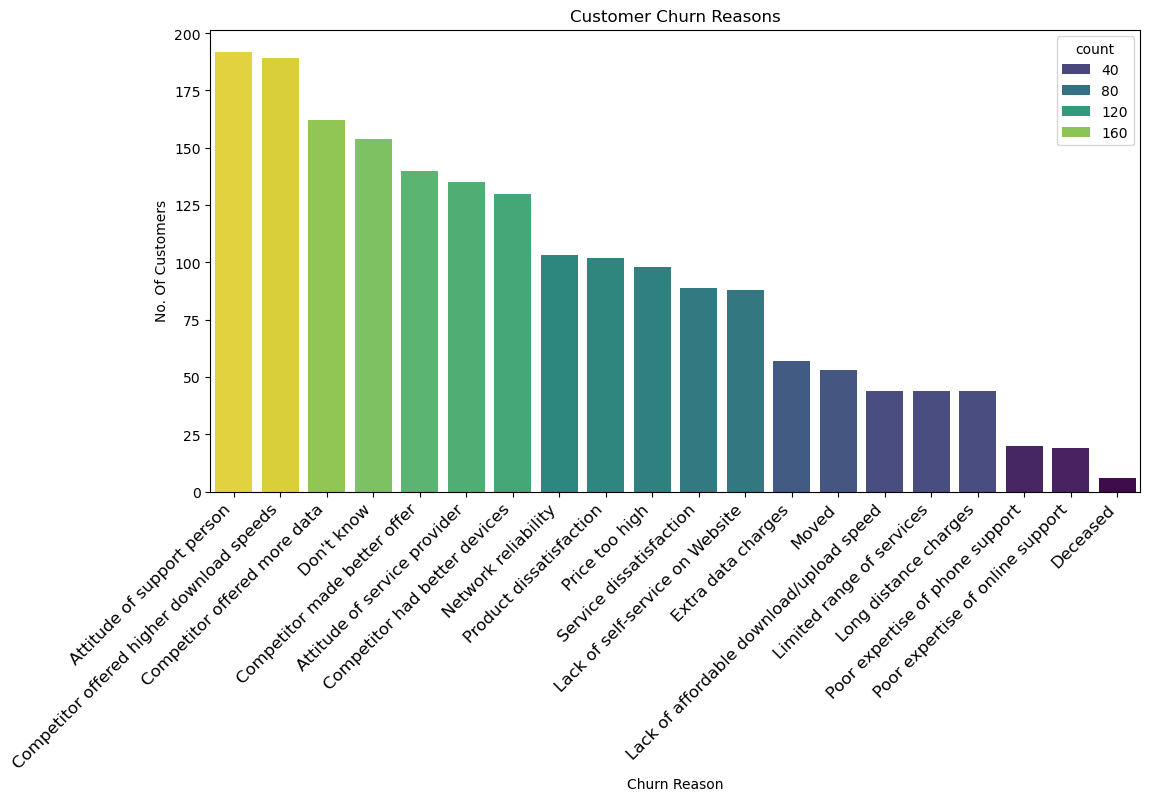

In [37]:
churnValue_Reason = df[['Churn Value', 'Churn Reason']]
churnValue_Reason
churned = churnValue_Reason[churnValue_Reason['Churn Value'] == 1]
reasonCounts = churned.value_counts()
reasonCounts = pd.DataFrame(reasonCounts).reset_index().rename(columns={'index': 'Churn Reason', 0: 'Count'})
reasonCounts
plt.figure(figsize=(12,6))
sns.barplot(x=reasonCounts['Churn Reason'], y=reasonCounts['count'], palette='viridis', hue = reasonCounts['count'])
plt.xlabel('Churn Reason')
plt.xticks(rotation= 45, # rotating labels
           horizontalalignment = 'right', # aligning them with the bars
           fontweight = 'light',
           fontsize = 'large' # setting the fonts
          )
plt.ylabel('No. Of Customers')
plt.title('Customer Churn Reasons')
plt.show()